### Use the ‘Student performance’ dataset to answer the questions given below:
    •	Create a new column called ‘Exam Score’ which aggregates the math, reading and writing scores. Use this new column as a dependent variable and fit a linear regression model. (4 marks)
    •	Calculate the R2, t-values, F value and Accuracy scores. What can you say about the variables and their relationship with ‘exam scores’ based on the calculated metrics. (3 marks)


In [5]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm

In [109]:
s=pd.read_csv("StudentsPerformance.csv")

In [110]:
s.head()

gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75

In [111]:
s.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [112]:
## Create a new column called ‘Exam Score’ which aggregates the math, reading and writing scores.

s['Exam_Score']=s['math score']+s['reading score']+s['writing score']
s.head()

gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  \
0                    none          72             72             74   
1               completed          69             90             88   
2                    none          90             95             93   
3                    none          47             57             44   
4                    none          76             78             75   

   Exam_Score  
0         218  
1         247  
2         278  
3         148  
4         229

In [113]:
s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
gender                         1000 non-null object
race/ethnicity                 1000 non-null object
parental level of education    1000 non-null object
lunch                          1000 non-null object
test preparation course        1000 non-null object
math score                     1000 non-null int64
reading score                  1000 non-null int64
writing score                  1000 non-null int64
Exam_Score                     1000 non-null int64
dtypes: int64(4), object(5)
memory usage: 70.4+ KB


In [114]:
s1=pd.get_dummies(s)
s1.head()

math score  reading score  writing score  Exam_Score  gender_female  \
0          72             72             74         218              1   
1          69             90             88         247              1   
2          90             95             93         278              1   
3          47             57             44         148              0   
4          76             78             75         229              0   

   gender_male  race/ethnicity_group A  race/ethnicity_group B  \
0            0                       0                       1   
1            0                       0                       0   
2            0                       0                       1   
3            1                       1                       0   
4            1                       0                       0   

   race/ethnicity_group C  race/ethnicity_group D  \
0                       0                       0   
1                       1                       0   
2                       0                       0   
3                       0                       0   
4                       1                       0   

               ...               \
0              ...                
1              ...                
2              ...                
3              ...                
4              ...                

   parental level of education_associate's degree  \
0                                               0   
1                                               0   
2                                               0   
3                                               1   
4                                               0   

   parental level of education_bachelor's degree  \
0                                              1   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   parental level of education_high school  \
0                                        0   
1                                        0   
2                                        0   
3                                        0   
4                                        0   

   parental level of education_master's degree  \
0                                            0   
1                                            0   
2                                            1   
3                                            0   
4                                            0   

   parental level of education_some college  \
0                                         0   
1                                         1   
2                                         0   
3                                         0   
4                                         1   

   parental level of education_some high school  lunch_free/reduced  \
0                                             0                   0   
1                                             0                   0   
2                                             0                   0   
3                                             0                   1   
4                                             0                   0   

   lunch_standard  test preparation course_completed  \
0               1                                  0   
1               1                                  1   
2               1                                  0   
3               0                                  0   
4               1                                  0   

   test preparation course_none  
0                             1  
1                             0  
2                             1  
3                             1  
4                             1  

[5 rows x 21 columns]

In [115]:
x=s1.drop(['math score', 'reading score','writing score','Exam_Score'],axis=1)
x.head()
x=sm.add_constant(x)
y=s1.Exam_Score

In [126]:
#split the data in train and test
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=1/3,random_state=200)

In [127]:
from sklearn.linear_model import LinearRegression

In [128]:
lm=LinearRegression() #created the machine learning algo

#use the lm to train my dataset
lm.fit(xtrain,ytrain) # Model is fitted on the training data


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [129]:
# Make predictions on the test data
pred = lm.predict(xtest)
pred

array([227.     , 196.90625, 157.96875, 230.875  , 187.1875 , 244.375  ,
       204.78125, 228.71875, 217.9375 , 195.59375, 195.78125, 219.125  ,
       183.21875, 209.90625, 184.96875, 195.40625, 238.6875 , 189.5    ,
       208.71875, 203.59375, 233.78125, 214.1875 , 203.59375, 187.3125 ,
       217.9375 , 192.25   , 194.1875 , 173.71875, 209.90625, 207.3125 ,
       172.625  , 194.96875, 184.96875, 254.34375, 168.53125, 202.40625,
       194.03125, 164.84375, 210.09375, 204.78125, 230.875  , 190.     ,
       219.25   , 206.1875 , 220.0625 , 191.03125, 199.3125 , 208.71875,
       195.5625 , 208.53125, 185.46875, 216.875  , 206.375  , 229.28125,
       228.71875, 204.1875 , 187.1875 , 181.09375, 231.0625 , 181.09375,
       193.1875 , 180.625  , 184.84375, 181.84375, 208.53125, 193.1875 ,
       241.46875, 217.90625, 168.90625, 195.78125, 221.40625, 222.03125,
       211.25   , 214.15625, 194.1875 , 214.15625, 173.90625, 184.84375,
       176.71875, 241.46875, 168.90625, 180.46875, 

In [130]:
# Finding R_squares value

from sklearn.metrics import r2_score
r2_score(y,lm.predict(x))

0.24011392637596318

#### Inference: r_squared value is very low. The efficiency of the model is very poor.

In [131]:
multimodel = sm.OLS(y,x).fit() #ordinary least squares in regression; fitting the machine on the data
multi_pred = multimodel.predict(x)

In [132]:
fittedvals=multimodel.fittedvalues
residuals=multimodel.resid

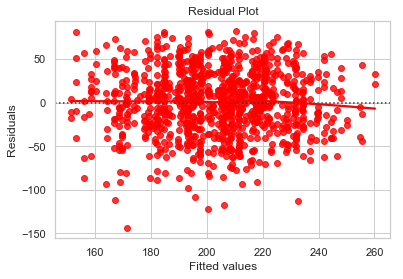

In [133]:
sns.set(style="whitegrid")
ax=sns.residplot(fittedvals,residuals,color='red',lowess=True)
ax.set(xlabel="Fitted values",ylabel="Residuals",title="Residual Plot")
plt.show()

#### From the above plot it is inferred that the data is linear since there is no pattern followed along the zero axis.

That is the datapoints are randomly scattered.

In [134]:
import scipy.stats as stats
import pylab

In [135]:
#Find the standardized Residual
st_residual=multimodel.get_influence().resid_studentized_internal


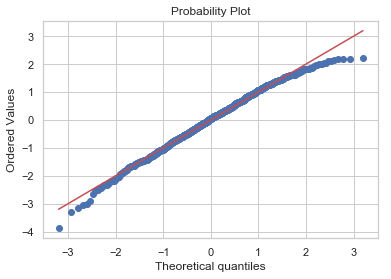

In [136]:
stats.probplot(st_residual,dist="norm",plot=pylab)
plt.show()

#the blue datapoints should go along the red line. Deviation denotes the data doesnot follow normal distribution

#### From the above plot, it is inferred that most of the datapoints is normal.

In [137]:
s1.corr()

math score  reading score  \
math score                                        1.000000       0.817580   
reading score                                     0.817580       1.000000   
writing score                                     0.802642       0.954598   
Exam_Score                                        0.918746       0.970331   
gender_female                                    -0.167982       0.244313   
gender_male                                       0.167982      -0.244313   
race/ethnicity_group A                           -0.091977      -0.096274   
race/ethnicity_group B                           -0.084250      -0.060283   
race/ethnicity_group C                           -0.073387      -0.003074   
race/ethnicity_group D                            0.050071       0.035177   
race/ethnicity_group E                            0.205855       0.106712   
parental level of education_associate's degree    0.063228       0.064386   
parental level of education_bachelor's degree     0.079664       0.096024   
parental level of education_high school          -0.128725      -0.151068   
parental level of education_master's degree       0.060417       0.106452   
parental level of education_some college          0.037056       0.010782   
parental level of education_some high school     -0.079852      -0.071369   
lunch_free/reduced                               -0.350877      -0.229560   
lunch_standard                                    0.350877       0.229560   
test preparation course_completed                 0.177702       0.241780   
test preparation course_none                     -0.177702      -0.241780   

                                                writing score  Exam_Score  \
math score                                           0.802642    0.918746   
reading score                                        0.954598    0.970331   
writing score                                        1.000000    0.965667   
Exam_Score                                           0.965667    1.000000   
gender_female                                        0.301225    0.130861   
gender_male                                         -0.301225   -0.130861   
race/ethnicity_group A                              -0.110714   -0.104803   
race/ethnicity_group B                              -0.078254   -0.078247   
race/ethnicity_group C                              -0.010203   -0.030691   
race/ethnicity_group D                               0.082032    0.058902   
race/ethnicity_group E                               0.089077    0.141050   
parental level of education_associate's degree       0.064799    0.067414   
parental level of education_bachelor's degree        0.128297    0.106599   
parental level of education_high school             -0.182211   -0.161936   
parental level of education_master's degree          0.125693    0.102411   
parental level of education_some college             0.027989    0.026761   
parental level of education_some high school        -0.097326   -0.087247   
lunch_free/reduced                                  -0.245769   -0.290064   
lunch_standard                                       0.245769    0.290064   
test preparation course_completed                    0.312946    0.256710   
test preparation course_none                        -0.312946   -0.256710   

                                                gender_female  gender_male  \
math score                                          -0.167982     0.167982   
reading score                                        0.244313    -0.244313   
writing score                                        0.301225    -0.301225   
Exam_Score                                           0.130861    -0.130861   
gender_female                                        1.000000    -1.000000   
gender_male                                         -1.000000     1.000000   
race/ethnicity_group A                              -0.071001     0.071001   
race/ethnicity_group B            

In [138]:
from sklearn.preprocessing import PolynomialFeatures

In [139]:
pf=PolynomialFeatures() #when data shows non-linear pattern use PolynomialFeatures

In [140]:
#Transformed the Input variables for a better model
x=pf.fit_transform(x)

In [141]:
#Building the model
insr_model=sm.OLS(y,x).fit() #fitting the model on data
insr_pred=insr_model.predict(x)

In [142]:
print(insr_model.rsquared)


0.2655623639869301


From the above R_Squared value, by Polynomial Feature transformation, the accuracy has been increased to some extent.

That is from 24% to 26%.

In [143]:
from scipy.stats             import ttest_1samp,ttest_ind, wilcoxon
from statsmodels.stats.power import ttest_power
import matplotlib.pyplot     as     plt

In [148]:
t_statistic, p_value = ttest_1samp(s1['Exam_Score'], 95)  ## considering mu as 95%
print(t_statistic, p_value)

80.0787418099907 0.0


Inference:

From the R_squared value, it is inferred that the model is not with better efficiency.

The variables have very less correlation.(Negative correlation)